In [ ]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', as_frame=False)

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [ ]:
print(mnist.DESCR)

**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image b

In [ ]:
X, y = mnist.data, mnist.target

In [ ]:
X[:5]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
X.shape # 784 features for each image

(70000, 784)

In [ ]:
y.shape

(70000,)

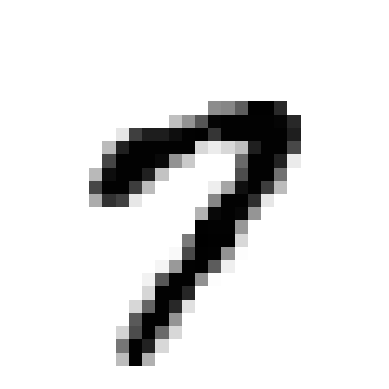

In [ ]:
import matplotlib.pyplot as plt

def plot_digit(image_data):
    image = image_data.reshape(28, 28)
    plt.imshow(image, cmap="binary")
    plt.axis("off")

some_digit = X[15]
plot_digit(some_digit)
plt.show()

In [ ]:
y[15]

'7'

## Split the Data

In [ ]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[:60000]

In [ ]:
X_train.shape, y_train.shape

((60000, 784), (60000,))

## Training a Binary Classifier

- Predicts if a given image is of '7'

In [ ]:
y_train_7 = (y_train == '7')
y_test_7 = (y_test == '7')

In [ ]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_7)

SGDClassifier(random_state=42)

In [ ]:
sgd_clf.predict([X[15]])

array([ True])

In [ ]:
y[12]

'3'

In [ ]:
sgd_clf.predict([X[12]])

array([False])

## Evaluate Model Performance

In [ ]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_7, cv=3)

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_train_7, y_train_pred)
cm

array([[52581,  1154],
       [  688,  5577]])

In [ ]:
y_train_perfect_predictions = y_train_7  # pretend we reached perfection
confusion_matrix(y_train_7, y_train_perfect_predictions)

array([[53735,     0],
       [    0,  6265]])

## Precision and Recall
- **precision** = TP / TP + FP
- **recall** = TP / TP + FN
- Recall is also known as `sensitivity` and `True Positive Rate (TPR)`
- F1 Score is a combination of precision and recall
- **F1 Score** = 2 * (precision * recall/ (precision + recall))

In [ ]:
from sklearn.metrics import precision_score, recall_score

precision_score(y_train_7, y_train_pred)  # == 3530 / (687 + 3530)

0.8285544495617293

In [ ]:
recall_score(y_train_7, y_train_pred)  # == 3530 / (1891 + 3530)

0.8901835594573024

# Types of classification
- Binary Classification
- Multiclass Classification
- Multilabel Classification
- Multioutput Classification